# One-dimensional transient groundwater flow


In [1]:
# load required modules for code below

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

## Scope

In this course, we will deal with transient groundwater flow in one-dimensional and radial situations (wells) for which analytic solutions are available. Analytic solutions are important because they allow insight in the behavior of the groundwater system, whereas numerical solutions do not; they only produce numbers. Analytic solutions are also important because they allow checking numerical models and checking numerical models is always necessary, not just because of possible errors in the model, but also because of possible errors in the input of the model. Analytical solutions also allow analysis of numerical models, which helps to understand their outcome. Finally, analytical solutions are powerful because they allow a rapid result with minimal input. They become even more powerful if combined with superposition and convolution.

## Governing partial differential equation

We will always start our discussion with the governing differential equation at hand. Once we have it, we need to solve it. To be able to do that we need boundary conditions specifying fixed heads or fixed discharges along certain parts of the model boundaries. In the case of transient solutions we also need initial conditions specifying the head everywhere in the considered domain at time zero. Initial and boundary conditions are as important as the differential equation itself.

One-dimensional flow means a cross section with no flow components perpendicular to it.

We will treat analytical solutions for one layer only. Analytical solutions for more than one layer exist and have been extended to arbitrary numbers of layers in the 1980s by Kick Hemker and Kees Maas, see for instance Maas (1986) and Hemker and Maas (1987). These solutions require matrix computations, which were cumbersome at the time, but which may nowadays be readily computed in programs like Matlab and Maple. An implementation of the so-called eigen values and eigen vectors would be necessary to compute such solutions in a spreadsheet. This is possible, but beyond this course. Therefore, we limit ourselves to single-layer cases.

To derive the governing partial differential equation for the considered 1D situation, start with continuity. Consider a small section of the cross section. It has length $\Delta x$, the water balance over a short time $\Delta t$ may, continuity can be expressed as follows:

$$ \left( - \left( q_x + \frac {\partial q_x} {\partial x} \Delta x \right)\right)\,\Delta t + N \Delta t = S \left( \phi_{t + \Delta t} - \phi_t \right) $$

With $q$ m2/d specific discharge, $N$ recharge, $S$ the storage coeffiient of the aquifer and $\phi$ the head in the aquifer. $\Delta t$ is the considered time step and $\Delta x$ the considered spatial step.

Letting $\Delta x \rightarrow dx$ and $\Delta t \rightarrow dt$, we get

$$  - \frac {\partial q_x} {\partial x} + N = S \frac {\partial s} {\partial t} $$

with Darcy saying $q_x = -kD \partial \phi / \partial x$ we have

$$ kD \frac {\partial^2 \phi} {\partial x^2} + N = S \frac {\partial \phi} {\partial t} $$

We first considere the situation without recharge, so that $N=0$, giving

$$ kD \frac {\partial^2 \phi} {\partial x^2} = S \frac {\partial s} {\partial t} $$

Equation [eq:diffusion-equation-in-s] is known as the diffusion equation. It appears in many scientific fields like with diffusion, dispersion, heat conduction, sorption, consolidation and so on. Many researchers have derived solutions for it for specific boundary conditions. The coefficient $kD/S$ is called the diffusivity, often written as a thick $D$, like $\mathbb{D}$, which always has dimension [L2/T] whatever the scientific branch is. The diffusivity is the ratio of the ease of the flow (transmissivity) and the storage:

$$\mathbb{D}=\frac{kD}{S}$$

In the case of a phreatic (unconfined, water table) aquifer, the aquifer thickness is no longer constant. However, there are no transient solutions that take a time varying aquifer thickness into account. Linearization is then unavoidable, meaning that one has to choose a proper average aquifer thickness and be aware that the head change should remain small with respect to the saturated aquifer thickness.


## Sinusoidal fluctuations in groundwater (like tides)

To compute flow and heads, we need to solve this partial differential equation with initial and boundary conditions pertaining to the situation we like to study.

This section deals exclusively with sinusoidal fluctuations in groundwater caused by a sinusoidal fluctuating head at the boundary at $x=0$. We deal with tidal fluctuations in groundwater first and then show temperature as a other application of the same basic partial differential equation.

A number of transient problems can be analyzed by assuming regular sinusoidal fluctuations of some boundary conditions. Generally the result will also behave like a sine in the same frequency. If we have the solution of a general harmonic fluctuation, we may solve many problems by superposition of any combination of frequencies that we need to adjust the fluctuations at the boundary to our liking. This way, hourly, daily, weekly and seasonal fluctuations may be readily combined. Examples of applications are tides in groundwater, penetration of temperature fluctuations, consolidation etc.

We will now consider a 1 dimensional aquifer perpendicular to a water body which is subject to sinus-like fluctuations of its water level. The situation is in the figure below.

![](./pictures/tideSinusoidalFluctuation.png)

Figure: Sinusoidal water level fluctuation in surface water causing tide in the groundwater system

The amplitude is indicated by the green error. The aquifer has constant transmissivity $kD$ and storage coefficient $S$. There is no recharge of the aquifer other than by interaction with the water body. The solution will be a sinusoidal fluctuation at any distance $x$, but it will be delayed and damped relative to the fluctuation in the surface water body. With this we try a solution to the pde that contains both damping with distance and delay.

$$ s(x, t) = \phi(x, t) - \phi_0{x} = A \exp(-\alpha x) \, \sin (\omega t - \beta x) $$

where $s(x, t)$ is the change of head due to the tidas fluctuations, which is independent of the mean head $\phi_0(x)$. Hence, $s(x, t)$ is superimposed on $\phi_0(x)$; it is irrelevant what $\phi_0(x)$ is.

$\omega$ is the angle velocity, such that $\omega T = 2 \pi$ with $T$ the cycle time (time of one complete wave).

The formula as written implies $s(0,0) = 0$ when $t=0$. One can choose any other angle at t=0, by writing the formula with

$$ \omega(t - t_0) = \omega\,t - \omega\,t_0 = \omega\,t -\beta_0 $$


Which simple add a constant to the argument.

Let us fill in this presumed solution into the pde, to see if it fullfils the pde and see what the relation to $\alpha$ and $\beta$ is.

$$ \frac 1 A \frac {\partial s} {\partial x} = -\alpha \exp(-\alpha x) \sin(\omega t-\beta x)- \beta \exp ( -\alpha x) \cos(\omega t- \beta x) $$

$$ \frac 1 A \frac {\partial^2 s} {\partial x^2} \alpha^2 \exp (-\alpha x) + \alpha \beta \exp(-alpha x) \cos(\omega t - \beta x) + \alpha \beta \exp(-\alpha x) \cos(\omega t- \beta x) - \beta^2 \exp(-\alpha x) \sin(\omega t - \beta x)$$

$$ \frac 1 A \frac {\partial s} {\partial t} = \omega \exp( -\alpha x) \cos(\omega t - \beta x)$$

By collecting the sines and cosines separately, we get

$$ \alpha^2 -\beta^2 = 0  \,\,\,\, \alpha = \beta $$

and, therefore,

$$ \frac {kD} {S} \alpha \beta = \omega $$

This yields

$$ \alpha = \sqrt { \frac {\omega S} {2 kD} } $$

Writing $\omega = \frac {2\pi} T$ this formula may also be written as

$$ \alpha =\sqrt { \frac {\pi  S } {T\, kD} }  $$

One may always add a constant to the argument to adapt to 
The formula as written above implies that s = 0 when 


### Example, the intrusion of a continuous wave into the aquifer

Show the wave as it intrudes into the aqufier as it is agitated by the wave in the surface water at $x=0$.

Assume the aquifer has constant transmissivity, $kD = 900$ m2/d, and storage coefficient, $S = 5e-3$. The wave has amplitude $A= 1.0$ [m] and angular velocity $\omega = 2 \pi /T = 2 \pi / 24$ [radians/h].

In [6]:
# setup, define the parameters, note that "np." means function comes from package "numpy" see top.
A     = 1.0 # [m] amplitude
omega = 2 * np.pi / 24. # [1/h]
kD    = 900/24 # [m2/d]/[h/d] = [m2/h], transmissivity
S     = 5e-3 # [ - ], storage coefficient
a     = np.sqrt(omega * S / (2 * kD)) # [1/m], damping coefficient
print('a = {} /m'.format(a))

a = 0.004177713791051667 /m


<IPython.core.display.Javascript object>


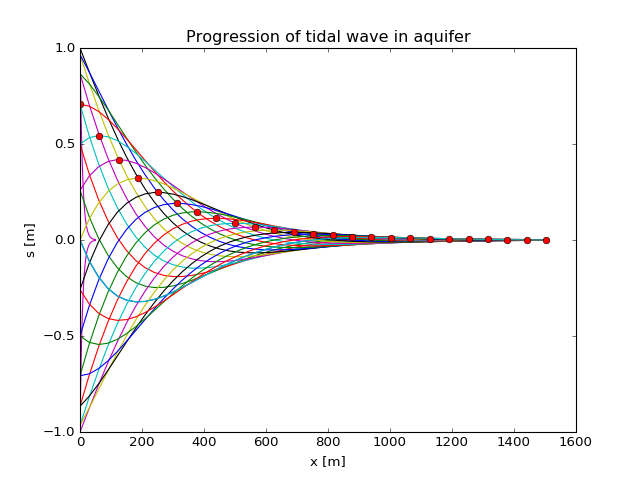

In [7]:
# generate x-coordinates to compute the values for
x  = np.linspace(0., 1500., 51) # [m]

# setup graphical display
fig = plt.figure()           # generate a figure "plt." comes from "matplotlib.pyplot", see top
ax = fig.add_subplot(111)    # put a pair of axes on the figure 
ax.set(xlabel='x [m]', ylabel='s [m]', title='Progression of tidal wave in aquifer')

# on this axes we plot the upper and lower envelope
ax.plot( +A * np.exp(-a * x), 'm')
ax.plot( -A * np.exp(-a * x), 'm')

# choose a number of time values to compute the wave position at
T = np.arange(0., 25.)  # [h], 25 times values from 0. through 25. with steps of 1.

# Plot the entire set of waves
for t in T:
    plt.plot(x, A * np.exp(- a * x) * np.sin(omega * t - a * x))

# Also follow the wave by following a point on the top of the wave.
# The top wave is horizontal at x=0 when t= T/8 = at t=3 h. (Because 2 pi/8 = pi/4 = 90 degrees, cos=0)

# The velocity of the wave is omega/a
vw = omega / a  # [m/h]
#, so the top of the wave is at
xp = vw * T

# plot these points as red dots 'ro'
plt.plot(xp,   A * np.exp(-a * xp) * np.sin(omega* (T + 3)- a * xp), 'ro')

plt.show()

### Velocity of the wave

The graph shows the wave position for every hour and the red circles follow the top of the wave. The distance between two successive red points is the distance that the wave travels in 1 h. It is also the horizontal distance between a point at the same elevation at two successive waves. Verify that by inspecting the graph.

A formal derivation for the velocity of the top of the wave is given below, by computing the velocity of the point of the wave that has its first derivative equal to zero. It has the same answer: $v=\frac {dx} {dt} = \frac \omega \alpha$

$$\frac {\partial s} {\partial x} = -\alpha \exp(-\alpha x) \sin(\omega t-\alpha x)
- \alpha \exp ( -\alpha x) \cos(\omega t- \alpha x) = 0 $$

$$ \exp(-\alpha x) \left(  \alpha \sin(\omega t - \alpha x)  + \alpha \cos(\omega t - \alpha x) \right) = 0 $$

$$ \exp(-\alpha x) \left(  \tan(\omega t - \alpha x) + 1 \right) = 0 $$

$$ tan(\omega t - \alpha x ) = -1 $$

$$ \omega t - \alpha x = -\frac \pi 4 $$

$$ \omega - \alpha \frac {dx} {dt} = 0 $$

$$ \frac {dx} {dt} = \frac \omega \alpha $$


### The semi-confined case (for illustration only)
In case we have a wave in a semi-confined aquifer with vertical leakage to or from an overlying layer with constant head, then no longer is $\alpha=\beta$. It is possible to derive the expressions, which then yields

$$ \alpha = \frac 1 \lambda \sqrt { +\frac 1 2 + \frac 1 2 \sqrt{ 1 + \left( \omega S c \right)^2} } $$

and

$$ \beta = \frac 1 \lambda \sqrt{- \frac 1 2 + \frac 1 2 \sqrt{1 + \left( \omega S c \right)^2 }  } $$

where
$$ \lambda = \sqrt{ kD c} $$

It is easy to verity that we get when $ c \rightarrow \infty$, i.e. when the aquifer is confined.

What then happens is: The 1 under the deepest $\sqrt{ }$ diappears, and the popwer of 2 drops against the $\sqrt{}$. Then the first term $\frac 1 2$ under the top $\sqrt{}$ drops to give

$$ \alpha = \beta = \frac 1 \lambda \sqrt{\frac {\omega S c} 2 } = \sqrt {\frac {\omega S} {2 kD} }  $$

which is the same as we derived for the confined situation.

### Example

Now let us compare the semi-confined with a $\lambda = 600$ m, but further it is the same as the situation with the confined aquifer above. 

In [8]:
lam = 200. # m.
c = lam**2 / kD
a = np.sqrt(+0.5 + 0.5 * np.sqrt(1. + (omega * S * c)**2)) / lam
b = np.sqrt(-0.5 + 0.5 * np.sqrt(1. + (omega* S * c) **2)) / lam
a_conf = np.sqrt(omega * S / (2 * kD))
print("c={} h, a={} /m, b={} /m".format(c, a, b))

c=1066.6666666666667 h, a=0.005828192077608682 /m, b=0.0029946323469669193 /m


<IPython.core.display.Javascript object>


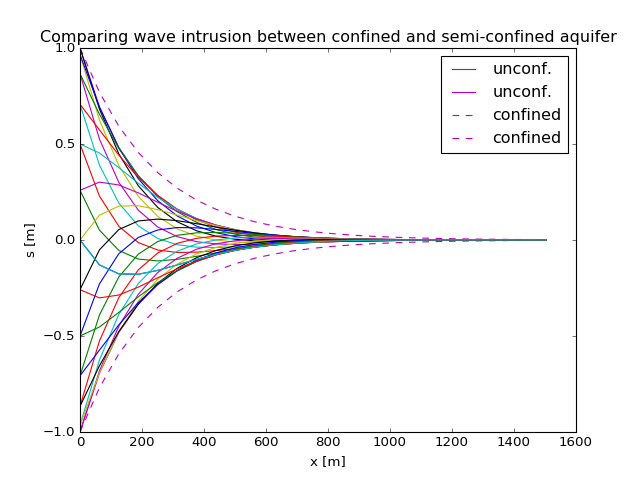

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(xlabel='x [m]', ylabel='s [m]', title='Comparing wave intrusion between confined and semi-confined aquifer')

ax.plot(xp, +A * np.exp(-a * xp), 'm', label='unconf.')
ax.plot(xp, -A * np.exp(-a * xp), 'm', label='unconf.')

ax.plot(xp, +A * np.exp(-a_conf * xp), 'm--', label='confined')
ax.plot(xp, -A * np.exp(-a_conf * xp), 'm--', label='confined')

for t in T:
    ax.plot(xp, A * np.exp(-a * xp) * np.sin(omega * t - b * xp))

ax.legend(loc='best')
plt.show()

## Arbitrarily fluctuating head at x=0, superposition of waves

If we have an arbitrary fluctuating input signal, one that consists of several many simultaneous waves, each with its own amplitude, omega and phase shift, can we then compute its overal effect on the groundwater heads and flows?

Of course we can: this is just a matter of superposition, i.e. summing the effect of the individual waves.

Let us assume the fluctuation at $x=0$ can be described by 5 individual waves each with it's own amplitude, omega and phase shift. A phase shift is the phase at t=0. It is included in the argument of the $\sin(... - \theta)$ where $\theta = 2 \pi t_{delay}/T$ and  $t_{delay}$ is the time at which the $\sin(\omega t -\theta) = 0$ at $x=0$.

<IPython.core.display.Javascript object>


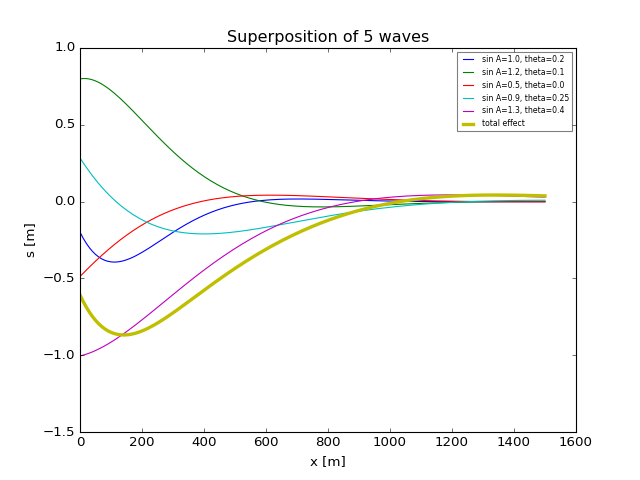

In [10]:
A     = [1.0, 1.2, 0.5, 0.9, 1.3] # [m] amplitudes 
theta = [0.2, 0.1, 0., 0.25, 0.4] # [-] angles in radians
Times = [ 3.,  5., 7.,  11., 13.] # [h] cycle times of individual waves
kD = 900/24 # [m2/h]
S  = 1e-3 # [-]
times = np.arange(0., 24., 3.)
x = np.linspace(0., 1500., 150)

ax = plt.figure().add_subplot(111)
ax.set(xlabel='x [m]', ylabel='s [m]', title='Superposition of 5 waves')

stot = np.zeros(x.shape)
t = times[4]
for T, ampl, the in zip(Times, A, theta):
    omega = 2 * np.pi / T
    a = np.sqrt(omega * S / (2 * kD))

    s = ampl * np.exp(-a * x) * np.sin(omega * t - a * x - the)
    ax.plot(x, s, label='sin A={}, theta={}'.format(ampl, the))
    stot += s
ax.plot(x, stot, lw=3, label='total effect')
ax.legend(loc='best', fontsize='xx-small', framealpha=0.5)
plt.show()


The next step is to show this total wave for all the times.

To do this copy the above code and adapt this to show all times, but don't show the individual waves, for this gives so many waves, that there will be no overview about what's going on in the graph.

<IPython.core.display.Javascript object>


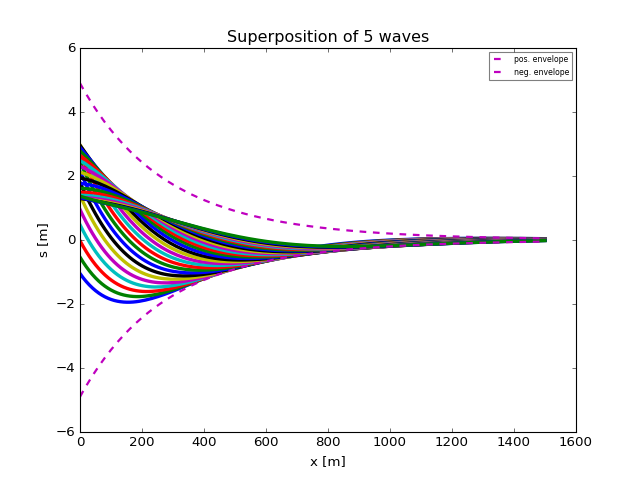

In [11]:
A     = [1.0, 1.2, 0.5, 0.9, 1.3] # [m] amplitudes 
theta = [0.2, 0.1, 0., 0.25, 0.4] # [-] angles in radians
Times = [ 3.,  5., 7.,  11., 13.] # [h] cycle times of individual waves
kD = 900/24 # [m2/h]
S  = 1e-3 # [-]
times = np.arange(0., 3., 0.1)
x = np.linspace(0., 1500., 150)

ax = plt.figure().add_subplot(111)
ax.set(xlabel='x [m]', ylabel='s [m]', title='Superposition of 5 waves')

pos_env = np.zeros(x.shape)
neg_env = np.zeros(x.shape)

for t in times:
    stot = np.zeros(x.shape)
    for T, ampl, the in zip(Times, A, theta):
        omega = 2 * np.pi / T
        a = np.sqrt(omega * S / (2 * kD))        
        env = ampl * np.exp(-a * x)
        s = env * np.sin(omega * t - a * x - the)
        #ax.plot(x, s, label='sin A={}, theta={}'.format(ampl, the))
        stot += s
        if t==times[-1]:
            pos_env += env
            neg_env -= env
    ax.plot(x, stot, lw=3)

ax.plot(x, pos_env, 'm--', lw=2, label='pos. envelope')
ax.plot(x, neg_env, 'm--', lw=2, label='neg. envelope')

ax.legend(loc='best', fontsize='xx-small', framealpha=0.5)
plt.show()


We had to make the time step very small and limit then number of them, to obtain a good impression about how the wave progresses.

## Temperature fluctuations in the subsurface

For heat conduction the same diffusion equation applies if we replace head change by temperature. The only thing that changes is the Diffusivity. The ease of flow is now the heat conduction $\lambda$ [W/m] = [((E/T)/L2)/(K/L)]=[E/(TKL)] and the storage is the heat capacity $\rho c$ [E/L3/K]. The dimension is again $\left[\mbox{\ensuremath{L^{2}}/T}\right]$:

$$\mathbb{D} = \frac{\lambda}{\rho c} [E/(TKL)] E/(KL3)]= [L2/T]$$

(notice that in the dimension E = energy, T = time, L = length, K = temperature (from Kelvin)).

Because both the heat conduction and the heat capacity have a contribution from both the water and the grains (solids) of the aquifer we can compute them as the combination of these contributions. With \epsilon for porosity we then have

$$\lambda	=	\epsilon\lambda_{w}+\left(1-\epsilon\right)\lambda_{s}$$
$$\rho c	=	\epsilon\rho_{w}c_{w}+\left(1-\epsilon\right)\rho_{s}c_{s}$$

$\rho$ [M/L3] is density and $c$ [E/(MK)], i.e. heat per kg solids per degree kelvin (= degree Celsius).

The heat capacity of saturated sandy soils is about $\lambda= 3$ W/m/K = 3 [J/s/m/K]. The specific heat capacity of water is $c_{w}$=4018 J/kg/K and that of sand grains $c_{s}\approx 800 [J/kg/K]. With $\rho_{s}\approx 2650 [kg/m3] and $\epsilon\approx35\%$ we get $\rho c=2.85\times10^{6}$ [J/m^{3}/K].

The diffusivity then becomes

$$\mathbb{D}=\frac{\lambda}{\rho c}=\frac{3}{2.85\times10^{6}}=1.06 \times10^{-3} \, [m^{2}/s]= 0.091 [m2/d]$$

From which we have

$$a=\sqrt{\frac{\omega}{2\mathbb{D}}}=\sqrt{\frac{\pi}{T\mathbb{D}}}$$

With these values it is possible to compute between what temperatures the temperature varies at different depth depending on the cycle time, i.e. due to daily, weekly, monthly or yearly temperature fluctuations at ground surface, the so-called temperature envelopes according to

$$T_{mean}-A\,\exp\left(-az\right)\le temp\le T_{mean}+A\,\exp\left(-az\right)$$

The monthly temperature in the Netherlands varies between 3.1C in January and 17.9 in July. The yearly amplitude is thus 7.4C with an average of 10.5C. Using this in the example, we can compute the temperature envelopes, that is, the lowest and highest temperatures lines between which the actual temperature will vary during one cycle time. Figure [fig:Temperature-envelopes-in-subsurface] shows the results, all computed for the same mean temperature and the same amplitude but for different cycle times as indicated in the legend. With the used data, the yearly temperature variation will barely reach 20 m below ground surface, a decade 50 m and 30 years 100 m. This implies that climate change may be measured using the change of the temperature at for instance 50 m below ground surface when measurements in the past are available, as is actually the case in the Netherlands.

![Temperature envelopes](./pictures/temperatureEnvelopes.png)

Figure: Temperature envelopes in the subsurface due to temperature fluctuations at ground surface with mean 10C and amplitude 7.4C. Envelopes depend on cycle time of the fluctuation (see legend).

## Illustration only: An arbitrily fluctuating river, solved by superposing its constituing waves

To make matters a bit more practical, let us assume that we have a measured time-varying river level for which we want to compute the dynamic effect on the groundwater, i.e. the time varying head and or flows.

So now not the sin or cos with its amplitues, omegas and thetas are given, but the varying river level itself.

We could use our formula if we had this varying river level in the form of a number of individual waves, each of whcih has a fixed but arbitrary amplitude, frequence and phase.

So assuming that it is possible to split (decompose) a time-varying signal into a set of constituting waves, that, when added together give back that original varying river lavel, how can we do that?

It is possible to express any time varying signal intot a large set of constituting waves. It is always done in telecommunications, audio, television and many other branches of science and technology. The tool for this is the Discrete Fourier Transform, or the Fast Fourier Transform (fft). It is readily available in python.

Let us do some exercises to show that it works.

First we construct a signal based on a set of known waves. Then we take this signal, try to find the underlying waves with the fast fourier transform, and then reconstruct the original signal.

<IPython.core.display.Javascript object>


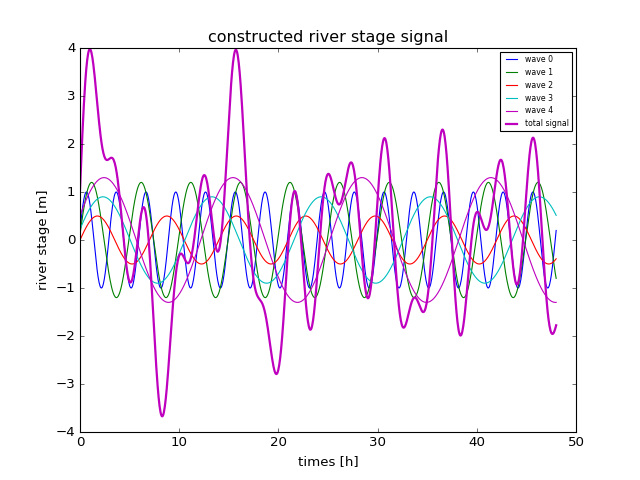

In [12]:
A     = [1.0, 1.2, 0.5, 0.9, 1.3] # [m] amplitudes 
theta = [0.2, 0.1, 0., 0.25, 0.4] # [-] angles in radians
Times = [ 3.,  5., 7.,  11., 13.] # [h] cycle times of individual waves

N = 1000
times = np.linspace(0, 48., N) # signal lasts 48 hours, and we sample 1000 values of it

ax = plt.figure().add_subplot(111)
ax.set(xlabel='times [h]', ylabel='river stage [m]', title='constructed river stage signal')

sig = np.zeros(times.shape)
I = range(len(A))
for i, ampl, the, T in zip(I, A, theta, Times):
    s = ampl * np.sin(2 * np.pi / T * times + the)
    ax.plot(times, s, label='wave {}'.format(i))
    sig += s
ax.plot(times, sig, 'm', lw= 2, label='total signal')
ax.legend(loc='best', fontsize='xx-small')
plt.show()

Now let the fft do its work to break $sig$ into its consituting waves.

<IPython.core.display.Javascript object>


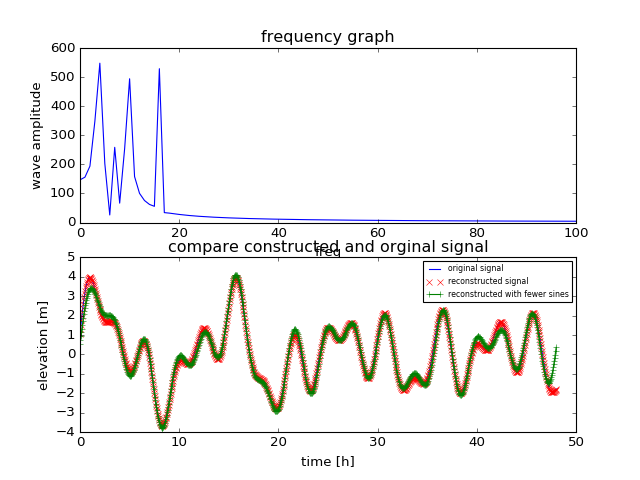

/Users/Theo/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [13]:
X = np.fft.fft(sig, N)

n = np.arange(N)

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.set(xlim=(0, 100),xlabel='freq', ylabel='wave amplitude', title='frequency graph')
ax1.plot(n, abs(X))


sig_recon = np.zeros(sig.shape, dtype=complex)
sig_recon1= np.zeros(sig.shape, dtype=complex)
for k in n:
    sig_recon += X[k]/N * np.exp(2 * np.pi * 1j * k * n/N)
    if abs(X[k])>100:
        sig_recon1 += X[k]/N * np.exp(2 * np.pi * 1j * k * n/N)

ax2 = fig.add_subplot(212)
ax2.set( xlabel='time [h]', ylabel='elevation [m]', title='compare constructed and orginal signal')
ax2.plot(times, sig, 'b', label='original signal')
ax2.plot(times, sig_recon, 'rx', label='reconstructed signal')
ax2.plot(times, sig_recon1, 'g+-', label='reconstructed with fewer sines')
ax2.legend(loc='best', fontsize='xx-small')
plt.show()


As can be seen, the upper graph shows the frequencies that were discovered by the fft. The lower graph shows the original signal (blue, covered by the recovered signals. The first recovered signal used all frequencies, while the second recoverd signal only uses the frequencies with wave amplitude larger than 100. Both give essentially the same result.

The theory of the fft and the discrete fft can be found on Wikipedia. It is not necessary for the course, it is only used to demonstrate the techniquen and to show how a simple analytical groundwater solution can be utilized to simulate a complicated signal (or situation) by means of superposition.

### Example with a measured river water level curve

Below is a "measured" varying water level of which we desired to compute the impact on the groundwater further away from the river.

<IPython.core.display.Javascript object>


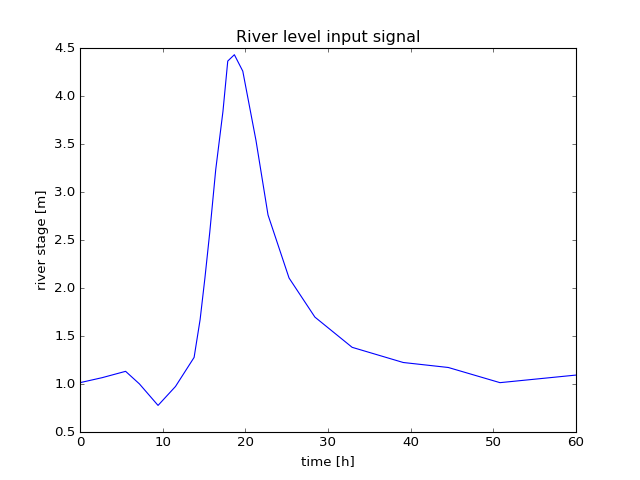

In [14]:
# Data showing a wave, first column = time [d], second column = river stage [m]a
ty = np.array( [[       0.0,     1.014],
                [     2.681,     1.066],
                [     5.516,     1.132],
                [     7.188,     1.001],
                [     9.441,     0.777],
                [    11.549,     0.974],
                [    13.803,     1.277],
                [    14.530,     1.671],
                [    15.111,     2.104],
                [    15.693,     2.577],
                [    16.420,     3.234],
                [    17.292,     3.839],
                [    17.874,     4.364],
                [    18.673,     4.430],
                [    19.691,     4.259],
                [    21.290,     3.536],
                [    22.744,     2.761],
                [    25.289,     2.104],
                [    28.414,     1.697],
                [    32.921,     1.382],
                [    39.100,     1.224],
                [    44.552,     1.172],
                [    50.804,     1.014],
                [    60.0,       1.093]])
ax = plt.figure().add_subplot(111)
ax.set(xlabel='time [h]', ylabel='river stage [m]',title='River level input signal')
ax.plot(ty[:,0], ty[:,1])
plt.show()

The next step is to interpolate the curve and to sample it. Using scipy.interpolate.interp1d we generate a "function" that gives us interpolated values at any disired time.

<IPython.core.display.Javascript object>


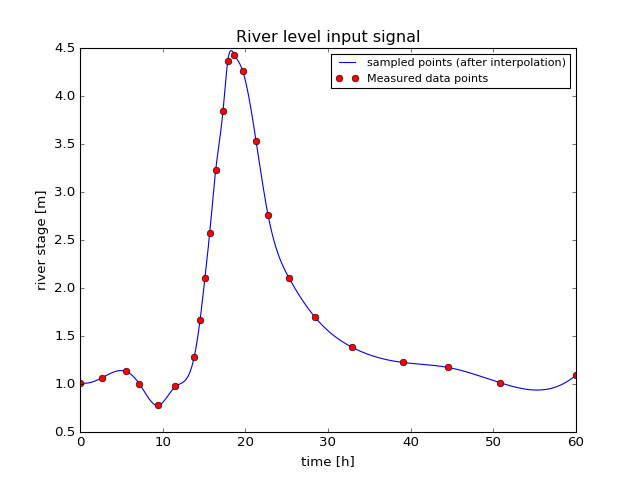

In [15]:
from scipy.interpolate import interp1d
wave = interp1d(ty[:,0], ty[:,1], kind='cubic') # interpolator

N = 12 * 60 # one sample each 5 minutes (12 times per hour)
t = np.linspace(ty[0,0], ty[-1,0], N)
y = wave(t)

ax = plt.figure().add_subplot(111)
ax.set(xlabel='time [h]', ylabel='river stage [m]',title='River level input signal')
ax.plot(t, y, '-', label='sampled points (after interpolation)')
ax.plot(ty[:,0], ty[:,1], 'ro', label='Measured data points')
ax.legend(loc='best', fontsize='small')
plt.show()

Now let's see if we can break this signal into a set of waves for use by our function.

<IPython.core.display.Javascript object>


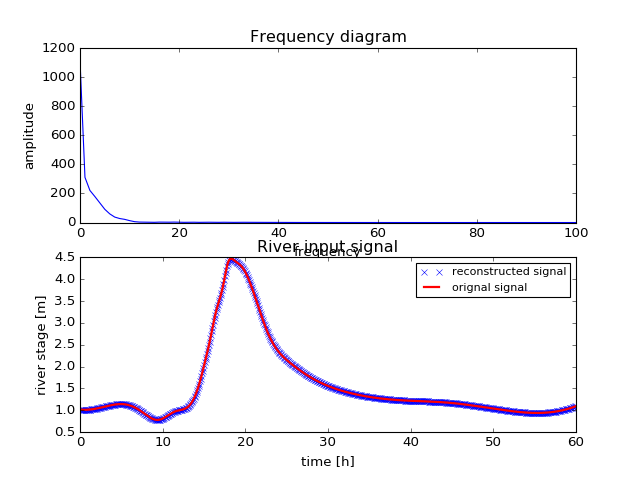

[ 1.54814204  0.43161111  0.43161111]
[ 0.         -2.30608406  2.30608406]


/Users/Theo/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [16]:
n = np.arange(N)
X = np.fft.fft(y, N)

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.set(xlim=(0, 100), xlabel='frequency', ylabel='amplitude', title='Frequency diagram')
ax2 = fig.add_subplot(212)
ax2.set(xlabel='time [h]', ylabel='river stage [m]', title='River input signal')

ax1.plot(n, np.abs(X))

yr = np.zeros(y.shape, dtype=complex)
for k in n:
    #if np.abs(X[k]/N)>0.4: # take only a few waves
    yr += X[k]/N * np.exp(2 * np.pi * 1j * k * n/N)

ax2.plot(t, yr, 'x', label='reconstructed signal')
ax2.plot(t, y, 'r-', lw=2, label='orignal signal')
ax2.legend(loc='best', fontsize='small')


# test reconstruction
np.abs(X/N)[np.abs(X/N)>0.4]
I = np.where(np.abs(X/N)>0.4)[0]
print(np.abs(X[I]/N))
print(np.angle(X[I]/N))

#s = np.zeros(t.shape, dtype=complex)
#for k in n:
#    s += X[k]/N * np.exp(2 * np.pi * 1j * k * n/N)
#    ax2.plot(t, s, '-')
plt.show()

Which shows that we can reconstruct the the original signal accurataly with the waves that were discovered by fft.

This puts us in the position to construct the groundwater signal. This is done by superimposing the discovered waves.

Let's do an example.

<IPython.core.display.Javascript object>


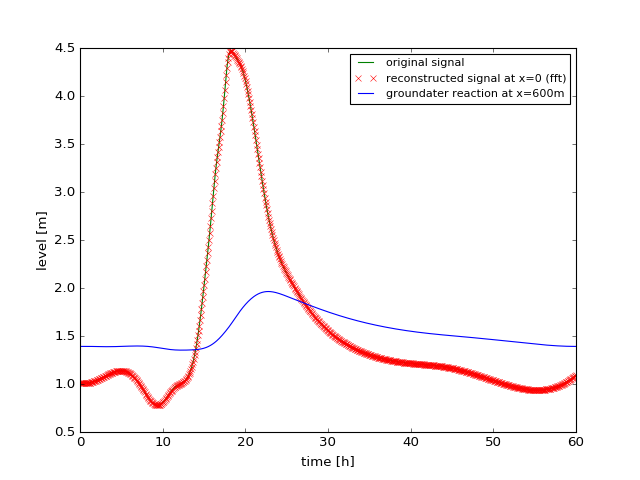

          k          T      omega          a        Amp      theta


/Users/Theo/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [17]:
kD = 900/24 # m2/h
S = 1e-3

ax = plt.figure().add_subplot(111)
ax.set(xlabel='time [h]', ylabel='level [m]')
x = 600 # m from the river

s0 = np.zeros(t.shape, dtype=complex)
s1   = np.zeros(t.shape, dtype=complex)
print((' {:>10s}'*6).format('k', 'T', 'omega', 'a', 'Amp', 'theta'))

I = np.where(np.abs(X)>0)[0]

T     = (t[-1] - t[0])
for k in n:
    Amp   = np.abs(  X[k]/N)
    theta = np.angle(X[k]/N)

    omega = 2 * np.pi *k / T
    a = np.sqrt( omega * S /(2 * kD))

    s0 += X[k]/N * np.exp(2 * np.pi * 1j * k * n/N)
    s1 += Amp * np.exp(-a * x) * np.cos( a* x -omega * t - theta)

    #print('{:10.3g} {:10.3g} {:10.3g} {:10.3g} {:10.3g} {:10.3g}'.format(k, T, omega, a, Amp, theta))
    
ax.plot(t, y, 'g', label='original signal')
ax.plot(t, s0, 'rx', label='reconstructed signal at x=0 (fft)')
ax.plot(t, s1, 'b', label='groundater reaction at x={:.3g}m'.format(x)) # need to add the mean of y (conained in sin waves)
ax.legend(loc='best', fontsize='small')
plt.show()


### Discrete Fourier transform (see Wikipedia)

Correlation between signal x and y is

$$ \sum_{i=0}^N x_i y_i $$

Correlation and DFT

$$ X_k =\sum_{i=0}^{N-1} x_n \exp \left( - 2 \pi i k \frac n N \right), \,\,\, k \in Z $$

This expresses the correlation between the signal $x(n)$ and the function $ \exp ( - 2 \pi i k \frac n N ) $

Back transformation:

$$ x_n = \frac 1 N \sum_{k=0}^{N-1} X_k \exp \left(2 \pi i k \frac n N \right), \,\,\,\, n \in Z $$

Power specttrum. This is in fact the absolute value of the fft outcome squared:

$$ P_k = Re \left(X_k^2\right) + Im \left(X_k^2 \right) = \left| X_k\right|^2$$

Amplitude is $ \left|X_x \right| $, the angle (phase) is $angle(X_x)$

$$ x_n = \sum_{k=0}^{N-1} \frac {X_k} N \left(\cos \left(\frac {2 \pi k n} N \right) - i \sin \left(\frac {2 \pi k n} N \right) \right) $$



## Questions

1. Prove the correctness of the given solution yourself. As an extra exercise you could prove that equation [eq:QfluctuationStage] is correct by filling it into the partial differential equation for continuity $\frac{\partial Q}{\partial x}=-\frac{S}{kD}\frac{\partial s}{\partial t}$.

2. If the transmissivity if doubled, what is the effect on the drawdown?

3. When the \omega is doubled, what is the effect on the drawdown?

4. Explain how the distance to where the fluctuation of the sea or lake reaches in the aquifer depends on its frequency.

5. What is the depth effect of waves on the beach with one cycle per second, tides with one cycle per 12 hours, moon-tides with one cycle per two weeks in an aquifer with transmissivity is 500 m2/d and a storage coefficient of 0.001 and 0.1 respectively?

6. Let the solution to the diffusion equation for the confined aquifer be $s\left(x,t\right)=A\,\exp\left(-ax\right)\sin\left(\theta_{0}+\omega t-ax\right)$ and let $kD= 1000$ m2/d, $S=10e-3$, and the amplitude $A=2$ m, and $\theta_{0}$ is an arbitrary constant. Take time in days and show the head-change $s\left(x,t\right)$.

7. Include the discharge $Q\left(x,t\right)$

8. Compute and also show the envelope of the wave as a function of $x$.

9. How far inland can we still measure the tide if our device allows us to see a variation of 1 cm?

10. What is the velocity of the wave?

11. What is the delay at 1000 m from the shore (or show the delay graphically as function of $x$)?

12. Ad the case for a storage coefficient, $S_{y}=0.2$. And show the relation between the case with $S=0.001$ and $S_{y}=0.2$.

13. Create a complex input using of 4 sines, each with a different initial angle $\theta_{0}$, amplitude A and angular velocity $\omega$ and show the result.

Following question in a new computation:

1. The head in a lake above a clay bottom varies daily 30 cm. How deep does this fluctuation penetrate the underlying clay layer with conductivity of 10e-4 m/d and a specific storage coefficient of $S_{s}=0.0001$ /m?

2. What if the variation is weekly, monthly and seasonally only? 

3. What is the penetration depth of a diurnal, seasonal and centennial temperature wave at ground surface given and porosity of $\epsilon=35%\%$
?

4. If the sea is shallow and the clay layer is below the sea bottom, what will be the amplitude in the confined aquifer for the water compressibility $\beta_{w}=5\times10^{-5}$ and porous matrix compressibility $\beta_{s}=2e-5$ m2/N?

5. If the clay layer would be semi-pervious, what would this mean for the amplitude in the confined aquifer? Would it be greater, smaller compared with the case with a completely impervious layer?

Heat flow

1. Heat flow and groundwater flow show the same partial differential equation except that drawdown is replaced by temperature change. They both have one coefficient called diffusivity. What is the dimension of this diffusivity?

2. Diffusivity consists of a part expressing the ease of flow and a part that expresses the storage. What are these factors in the groundwater case and what are they in the heat flow case?

3. Show their dimensions and prove that the dimension of the diffusivity is the same in both cases.

4. Groundwater flow was ignored when we discussed heat flow. How would the temperature envelopes change due to upward groundwater seepage?

5. Also, how would they change due to downward seepage? How much would you estimate the effect on the yearly temperature envelopes if the recharge is 333 mm per year and porosity is 33\%?